# Niveles de Referencia en  CT, Medicina Nuclear INC

Elaborado por: Andrea Lizeth Lopez Rodriguez. Estudiante
Dirigido por: Nathaly Barbosa, Física Médica de Medicina nuclear del INC    

Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


##Archivo plano de texto, colocar los datos y los encabezados sin espacios 
#Para cargar los datos
#data = pd.read_csv('DRLCT.txt', delim_whitespace =True)

data = pd.read_csv('DRLSPECT.txt', delim_whitespace =True)

#para ver los primeros datos
data.head()

,CTDIvol,DLP,Tipo,EkV,EmA,skV,smA
0,3.06,95.85,Pulmonar,100,100,100,10
1,2.46,81.52,Rastreo,100,120,80,10
2,1.54,133.66,OSEA,100,42,80,10
3,1.28,51.75,OSEA,100,40,80,10
4,1.61,124.08,OSEA,100,79,80,10


In [48]:
######Conteo de variables categoricas
#data["Genero"].value_counts()


data["Tipo"].value_counts()


####GROUP BY in Python 
#data_test =data[['Tipo','DLP','CTDIvol']]
#data_grp=data_test.groupby(['Protocolo'],as_index=False).median()
#data_grp


####Pandas Method- Pivot()

#data_pivot=data_grp.pivot(index='Protocolo', columns='Genero')
#data_pivot

#####Heatmap
#plt.pcolor(data_pivot,cmap='RdBu')
#plt.colorbar()
#plt.show

#Filtrando datos por Genero 
#Masculino = ['M']
#FEMENINO
#data_femenino= data[~data.Genero.isin(Masculino)]
#data_femenino.shape
#MASCULINO
#data_masculino=data[data.Genero.isin(Masculino)]
#data_masculino.shape

OSEA            135
Rastreo          71
Pulmonar         11
Centinela         8
Paratiroides      8
ROLL              4
HYNIC             4
MIBG              2
Tumoral           1
Name: Tipo, dtype: int64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,Tipo,EkV,EmA,skV,smA
count,135.000000,135.000000,135,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,OSEA,NaN,NaN,NaN,NaN
freq,NaN,NaN,135,NaN,NaN,NaN,NaN
mean,2.720815,158.424222,NaN,107.555556,92.681481,82.370370,13.481481
std,1.734610,119.916083,NaN,13.574926,22.477402,9.479547,9.488290
min,1.180000,45.260000,NaN,100.000000,40.000000,80.000000,10.000000
25%,1.640000,101.495000,NaN,100.000000,79.000000,80.000000,10.000000
50%,2.460000,128.100000,NaN,100.000000,79.000000,80.000000,10.000000
75%,3.740000,169.275000,NaN,120.000000,110.000000,80.000000,20.000000


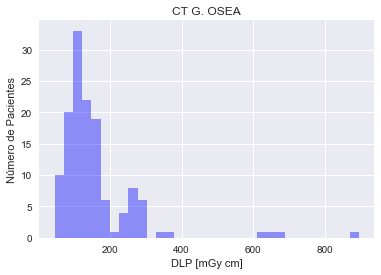

In [49]:
######################## OSEA ##############################

is_CTWBf =  data['Tipo']=='OSEA'
#is_CTWBf.head()
data_CTWBf=data[is_CTWBf]
#data_CTWBf.shape
###Masculino
#is_CTWBm =  data_masculino['Protocolo']=='CTWB'
#data_CTWBm=data_masculino[is_CTWBm]
#data_CTWBm.shape

###Carga de paquete de estadística (ajustes)
from scipy import stats

sns.distplot(data_CTWBf['DLP'],kde=False,color='b')
plt.title('CT G. OSEA')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')

plt.savefig('SPECTOSEA.pdf')
data_CTWBf.describe(include="all")


######### CTWBPED #####
#is_CTWBPEDf =  data_femenino['Protocolo']=='CTWBPED'
#data_CTWBPEDf=data_femenino[is_CTWBPEDf]
#data_CTWBPEDf.shape

#is_CTWBPEDm =  data_masculino['Protocolo']=='CTWBPED'
#data_CTWBPEDm=data_masculino[is_CTWBPEDm]
#data_CTWBPEDm.shape

######### CTWBOBESO #####
#is_CTWBOBESOf =  data_femenino['Protocolo']=='CTWBOBESO'
#data_CTWBOBESOf=data_femenino[is_CTWBOBESOf]
#data_CTWBOBESOf.shape

#is_CTWBOBESOm =  data_masculino['Protocolo']=='CTWBOBESO'
#data_CTWBOBESOm=data_masculino[is_CTWBOBESOm]
#data_CTWBOBESOm.shape



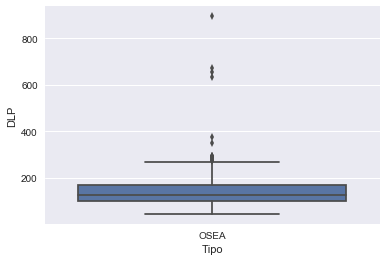

In [50]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTWBf)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

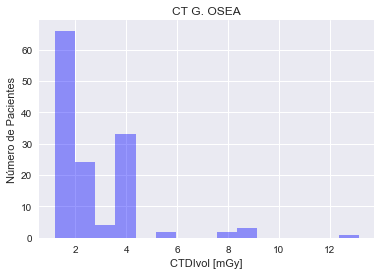

In [51]:
sns.distplot(data_CTWBf['CTDIvol'],kde=False,color='b')
plt.title('CT G. OSEA')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Número de Pacientes')

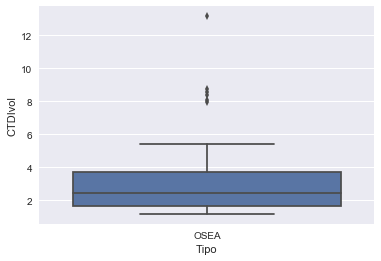

In [52]:
sns.boxplot(x="Tipo", y="CTDIvol", data=data_CTWBf)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,EkV,EmA,skV,smA
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.899577,130.599577,101.408451,121.126761,81.126761,11.408451
std,2.095613,129.654464,8.501391,19.186997,5.744388,3.503376
min,1.070000,48.670000,80.000000,74.000000,80.000000,10.000000
25%,2.460000,79.225000,100.000000,120.000000,80.000000,10.000000
50%,2.460000,105.150000,100.000000,120.000000,80.000000,10.000000
75%,2.460000,125.930000,100.000000,120.000000,80.000000,10.000000
max,14.800000,1030.600000,120.000000,219.000000,120.000000,20.000000


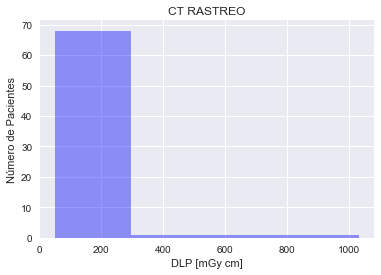

In [53]:
######################## RASTREO ##############################

######### CTABD #####
#is_CTABDf =  data_femenino['Protocolo']=='CTABD'
#data_CTABDf=data_femenino[is_CTABDf]
#data_CTABDf.shape

#is_CTABDm =  data_masculino['Protocolo']=='CTABD'
#data_CTABDm=data_masculino[is_CTABDm]
#data_CTABDm.shape

######### CTABDPELVI #####
#is_CTABDPELVIf =  data_femenino['Protocolo']=='CTABDPELVI'
#data_CTABDPELVIf=data_femenino[is_CTABDPELVIf]
#data_CTABDPELVIf.shape

is_CTABDPELVIm =  data['Tipo']=='Rastreo'
data_CTABDPELVIm=data[is_CTABDPELVIm]
#data_CTABDPELVIm.shape

sns.distplot(data_CTABDPELVIm['DLP'],bins=4,kde=False,color='b')
plt.title('CT RASTREO')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')

plt.savefig('SPECTRASTREO.pdf')
data_CTABDPELVIm.describe()



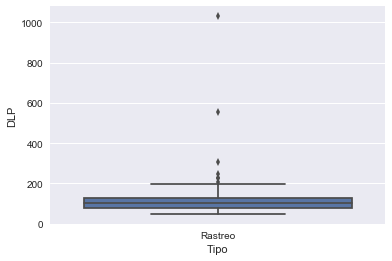

In [54]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTABDPELVIm)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

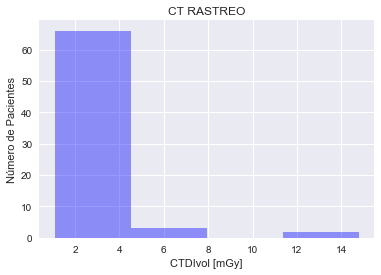

In [55]:
sns.distplot(data_CTABDPELVIm['CTDIvol'],bins=4,kde=False,color='b')
plt.title('CT RASTREO')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Número de Pacientes')

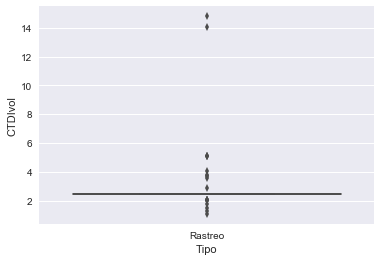

In [56]:
sns.boxplot(x="Tipo", y="CTDIvol", data=data_CTABDPELVIm)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,EkV,EmA,skV,smA
count,11.000000,11.000000,11.0,11.0,11.0,11.0
mean,3.121818,103.604545,100.0,100.0,100.0,10.0
std,0.205028,13.556383,0.0,0.0,0.0,0.0
min,3.060000,89.110000,100.0,100.0,100.0,10.0
25%,3.060000,93.055000,100.0,100.0,100.0,10.0
50%,3.060000,102.890000,100.0,100.0,100.0,10.0
75%,3.060000,109.200000,100.0,100.0,100.0,10.0
max,3.740000,131.590000,100.0,100.0,100.0,10.0


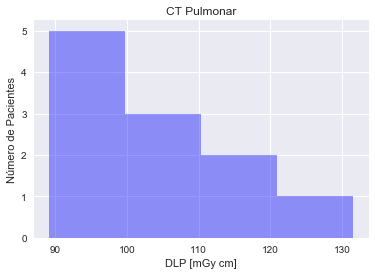

In [57]:
######################### Perfusion Pulmonar #################

is_CTPulmonar =  data['Tipo']=='Pulmonar'
data_CTPulmonar=data[is_CTPulmonar]
#data_CTABDPELVIm.shape

sns.distplot(data_CTPulmonar['DLP'],bins=4,kde=False,color='b')
plt.title('CT Pulmonar')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')

plt.savefig('SPECTPulmonar.pdf')
data_CTPulmonar.describe()



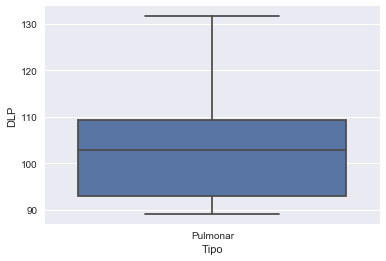

In [58]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTPulmonar)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

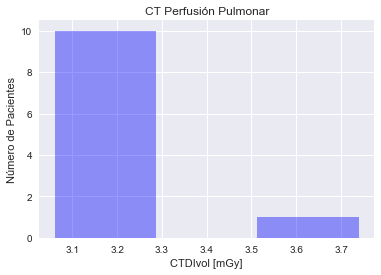

In [59]:
sns.distplot(data_CTPulmonar['CTDIvol'],kde=False,color='b')
plt.title('CT Perfusión Pulmonar')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Número de Pacientes')

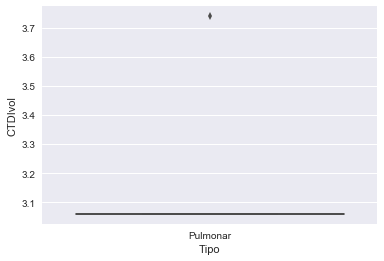

In [60]:
sns.boxplot(x="Tipo", y="CTDIvol", data=data_CTPulmonar)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,EkV,EmA,skV,smA
count,8.000000e+00,8.000000,8.0,8.0,8.0,8.0
mean,2.460000e+00,88.888750,100.0,120.0,80.0,10.0
std,4.747513e-16,10.821908,0.0,0.0,0.0,0.0
min,2.460000e+00,76.920000,100.0,120.0,80.0,10.0
25%,2.460000e+00,83.445000,100.0,120.0,80.0,10.0
50%,2.460000e+00,85.820000,100.0,120.0,80.0,10.0
75%,2.460000e+00,92.955000,100.0,120.0,80.0,10.0
max,2.460000e+00,105.150000,100.0,120.0,80.0,10.0


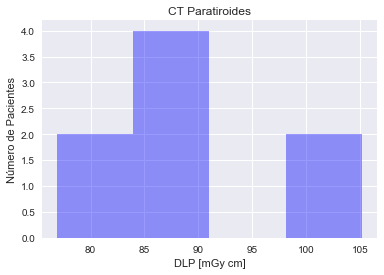

In [61]:
######################### Paratiroides #################

is_CTPara =  data['Tipo']=='Paratiroides'
data_CTPara=data[is_CTPara]


sns.distplot(data_CTPara['DLP'],bins=4,kde=False,color='b')
plt.title('CT Paratiroides')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')

plt.savefig('SPECTPara.pdf')
data_CTPara.describe()



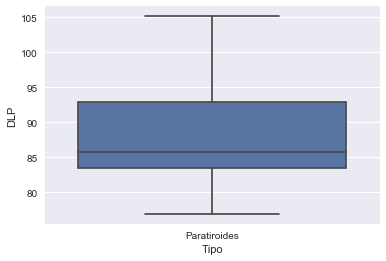

In [62]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTPara)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

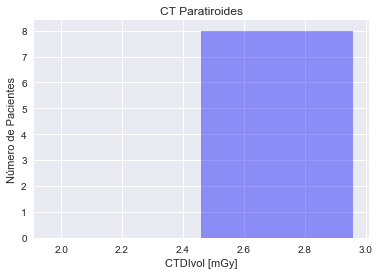

In [63]:
sns.distplot(data_CTPara['CTDIvol'],kde=False,color='b')
plt.title('CT Paratiroides')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Número de Pacientes')

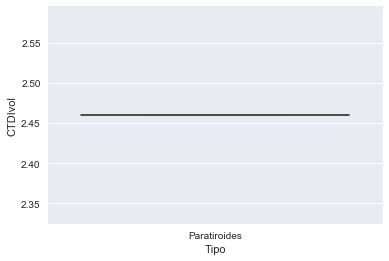

In [64]:
sns.boxplot(x="Tipo", y="CTDIvol", data=data_CTPara)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,EkV,EmA,skV,smA
count,8.000000,8.000000,8.000000,8.000000,8.0,8.0
mean,2.790000,109.780000,102.500000,123.750000,80.0,10.0
std,0.933381,33.338022,7.071068,10.606602,0.0,0.0
min,2.460000,74.160000,100.000000,120.000000,80.0,10.0
25%,2.460000,98.402500,100.000000,120.000000,80.0,10.0
50%,2.460000,104.845000,100.000000,120.000000,80.0,10.0
75%,2.460000,107.682500,100.000000,120.000000,80.0,10.0
max,5.100000,185.750000,120.000000,150.000000,80.0,10.0


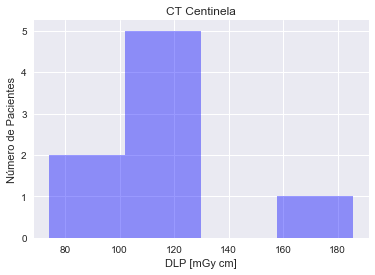

In [65]:
######################### Centinela #################

is_CTCenti =  data['Tipo']=='Centinela'
data_CTCenti=data[is_CTCenti]


sns.distplot(data_CTCenti['DLP'],bins=4,kde=False,color='b')
plt.title('CT Centinela')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')

plt.savefig('SPECTCentinela.pdf')
data_CTCenti.describe()



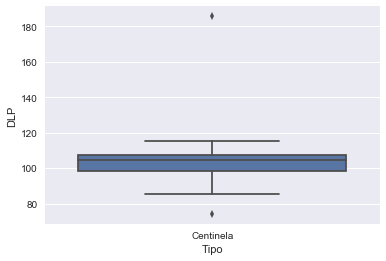

In [66]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTCenti)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

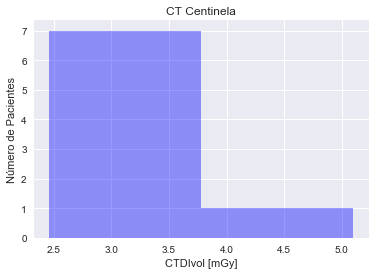

In [67]:
sns.distplot(data_CTCenti['CTDIvol'],kde=False,color='b')
plt.title('CT Centinela')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Número de Pacientes')

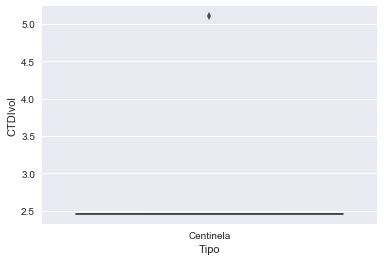

In [68]:
sns.boxplot(x="Tipo", y="CTDIvol", data=data_CTCenti)

In [34]:
######################## CTCYC Y CTCEREBRO ##############################

######### CTCYC #####
#is_CTCYCf =  data_femenino['Protocolo']=='CTCYC'
#data_CTCYCf=data_femenino[is_CTCYCf]
#data_CTCYCf.shape

#is_CTCYCm =  data_masculino['Protocolo']=='CTCYC'
#data_CTCYCm=data_masculino[is_CTCYCm]
#data_CTCYCm.shape

######### CTCEREBRO #####
#is_CTCEREBROf =  data_femenino['Protocolo']=='CTCEREBRO'
#data_CTCEREBROf=data_femenino[is_CTCEREBROf]
#data_CTCEREBROf.shape

#is_CTCEREBROm =  data_masculino['Protocolo']=='CTCEREBRO'
#data_CTCEREBROm=data_masculino[is_CTCEREBROm]
#data_CTCEREBROm.shape

(5, 7)

# ADULTO 

In [22]:
##### CTWB ######
#from scipy import stats
#is_CTWB =  data['Protocolo']=='CTWB'
#data_CTWB=data[is_CTWB]
#data_CTWB.shape
#data_CTWB.head()
#data_CTWB.describe()

Donde se presenta en orden el número de datos (count), su promedio (mean), su desviación estandar (std), el valor máximo (max) y el mínimo en cada columna de datos. Adicionalmente se muestra el percentil 25 (25 %), 50 (50 %) y 75 (75 %). Donde el percentil 25 indica que el 25% de los datos tienen un valor menor o igual al reportado. Entonces el percentil 50, hace referencia a la mediana de los datos :)

### Histograma CT WB

In [23]:
#sns.distplot(data_CTWB['CTDIvol'],kde=False,color='b')

### Decoración del histograma
#plt.title('CT Cuerpo Completo Adulto')
#plt.xlabel('CTDIvol [mGy]')
#plt.ylabel('Frecuencia')

In [24]:
######################## CTABDPELVI ##############################

######### CTABDPELVI #####
#is_CTABDPELVI =  data['Protocolo']=='CTABDPELVI'
#data_CTABDPELVI=data[is_CTABDPELVI]
#data_CTABDPELVI.shape
#data_CTABDPELVI.head()
#data_CTABDPELVI.describe()

In [25]:
#sns.distplot(data_CTABDPELVI['CTDIvol'],bins= 11,kde=False,color='b')

### Decoración del histograma
#plt.title('CT Abdomen y Pelvis Adulto')
#plt.xlabel('CTDIvol[mGy]')
#plt.ylabel('Frecuencia')

In [26]:
######################## CTCYC ##############################

######### CTCYC #####
#is_CTCYC =  data['Protocolo']=='CTCYC'
#data_CTCYC=data[is_CTCYC]
#data_CTCYC.shape
#data_CTCYC.head()
#data_CTCYC.describe()

In [27]:
#sns.distplot(data_CTCYC['DLP'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
#plt.xlabel('DLP [mGy cm]')
#plt.ylabel('Frecuencia')

In [28]:
######### CTCEREBRO #####
#is_CTCEREBRO =  data['Protocolo']=='CTCEREBRO'
#data_CTCEREBRO=data[is_CTCEREBRO]
#data_CTCEREBRO.shape
#data_CTCEREBRO.head()
#data_CTCEREBRO.describe()

In [29]:
#Para cargar los datos
#dato = pd.read_csv('DRLSPECT.txt', delim_whitespace =True)

#para ver los primeros datos
#dato.head()

In [30]:
#is_OSEA =  dato['ESTUDIO']=='OSEA'
#dato_OSEA=dato[is_OSEA]
#data_CTWB.shape
#data_CTWB.head()
#dato_OSEA.describe()

In [31]:
#is_RASTREO =  dato['ESTUDIO']=='RASTREO'
#dato_RASTREO=dato[is_RASTREO]
#data_CTWB.shape
#data_CTWB.head()
#dato_RASTREO.describe()

In [32]:
#sns.distplot(dato_OSEA['CTDIvol'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
#plt.xlabel('CTDIvol [mGy]')
#plt.ylabel('Frecuencia')

In [33]:
#sns.distplot(dato_RASTREO['CTDIvol'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
#plt.xlabel('CTDIvol [mGy]')
#plt.ylabel('Frecuencia')